In [74]:
import sys
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
# !{sys.executable} -m pip install pandas

# Clustering of the Candidate Sentiment Data

# Principal Component Analysis

### Read Mock Data

In [53]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'], index_col = False)

### Standardize the data (Is this even necessary?)

In [54]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

### Perform PCA

In [119]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [56]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

### Show Plot of the Dimension-Reduced Data

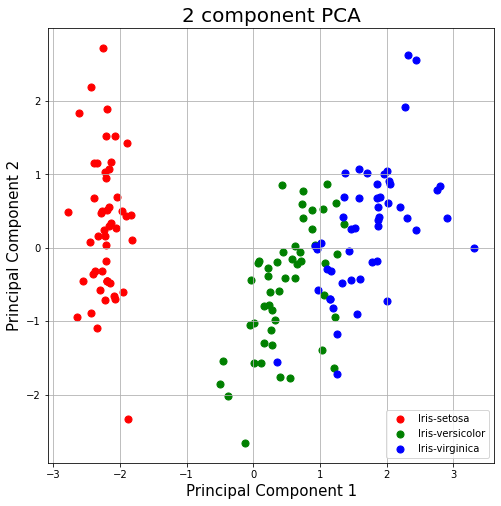

In [57]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Variance Explained

In [120]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

# Clustering

K-means, CURE and DBSCAN?

### DBSCAN

In [115]:
dbscan_cluster = DBSCAN(eps=0.3, min_samples=4).fit(principalDf)
core_samples_mask = np.zeros_like(dbscan_cluster.labels_, dtype=bool)
core_samples_mask[dbscan_cluster.core_sample_indices_] = True
dbscan_labels = dbscan_cluster.labels_
dbscan_labels

array([ 0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0, -1, -1, -1,
        0, -1,  1,  0,  1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  1,  0,  1,  0,  1,  0,  3,
        2,  3,  2,  2,  2,  2, -1,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,
       -1,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,  2,  2,  2,  2,  2,  2,
       -1,  2, -1,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2, -1,  2,  3,  2,
        3,  2,  3, -1,  2, -1, -1, -1,  3,  2,  3,  2,  2,  3,  3, -1, -1,
       -1,  3,  2, -1,  2,  3,  3,  2,  2, -1,  3, -1, -1, -1,  2,  2, -1,
        3,  3,  2,  3,  3,  3,  2,  3,  3,  3, -1,  3, -1,  2],
      dtype=int64)

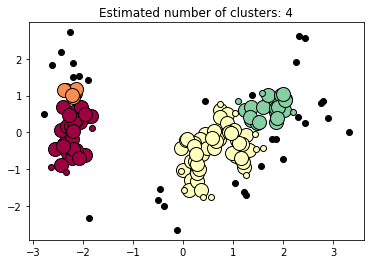

In [116]:
dbscan_unique_labels = set(dbscan_labels)
n_clusters_ = len(dbscan_unique_labels) - (1 if -1 in dbscan_labels else 0)


# Black removed and is used for noise instead.
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(dbscan_unique_labels))]
for k, col in zip(dbscan_unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = dbscan_labels == k

    xy = principalDf[class_member_mask & core_samples_mask].to_numpy()
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = principalDf[class_member_mask & ~core_samples_mask].to_numpy()
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

### K-Means

In [93]:
kmeans_cluster = KMeans(n_clusters=3, random_state=0).fit(principalDf)
kmeans_labels = kmeans_cluster.labels_
kmeans_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

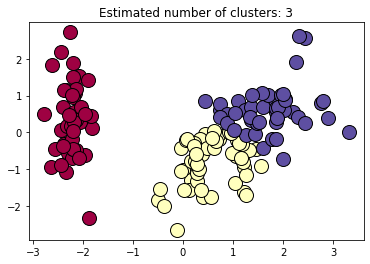

In [94]:
kmeans_unique_labels = set(kmeans_labels)
n_clusters_ = len(kmeans_unique_labels) - (1 if -1 in kmeans_labels else 0)


# Black removed and is used for noise instead.
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(kmeans_unique_labels))]
for k, col in zip(kmeans_unique_labels, colors):
    class_member_mask = kmeans_labels == k

    xy = principalDf[class_member_mask].to_numpy()
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

### Evaluating the clustering (Davies-Bouldin index)